# **What is machine learning?**

Simple Defination:

Science (art) of programming computers so they can learn from data

Arthur Samuel,1959

ML is field of study that gives comptuters the ability to learn without being explicitly programmed

Tom Mitchell , 1997

A computer program is said to learn from experienced E with respect to some task T & some peformance measure P, if its performance on T, as measured by P improve with experience E

Ex. Spam filter , System uses for learning is called Training Set. 
T - to flag email is spam or not (Task)
E - Traning set
P - Need to define (Performacne Meansure). let say accuracy (how many correctly classified)

# **Why Use Machine Learning?**

Traditional way of writing a program to identify email is spam or not?

Image source : shorturl.at/wCPQU

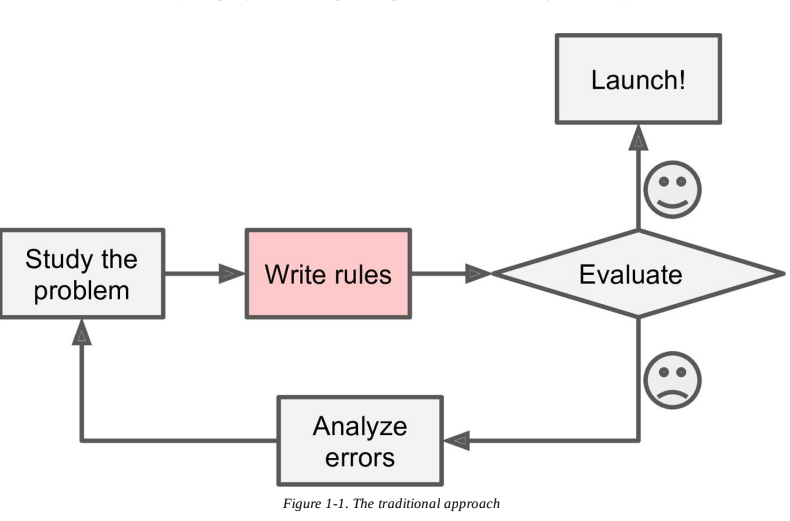

Since due to large number & complex rules , program is diffuclt to maintain
In contrast ML automatically detect the pattern without writing each & every rules. easy to maintain
It performs well though pattern change. 

Image source : shorturl.at/fqNTX

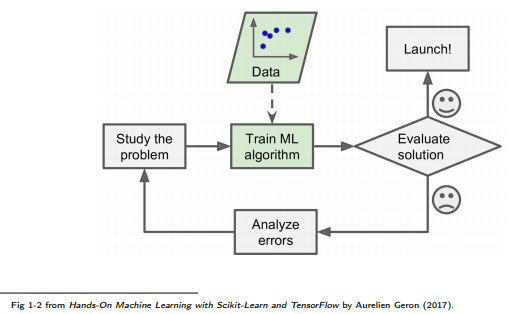

Image source: shorturl.at/fsuL6

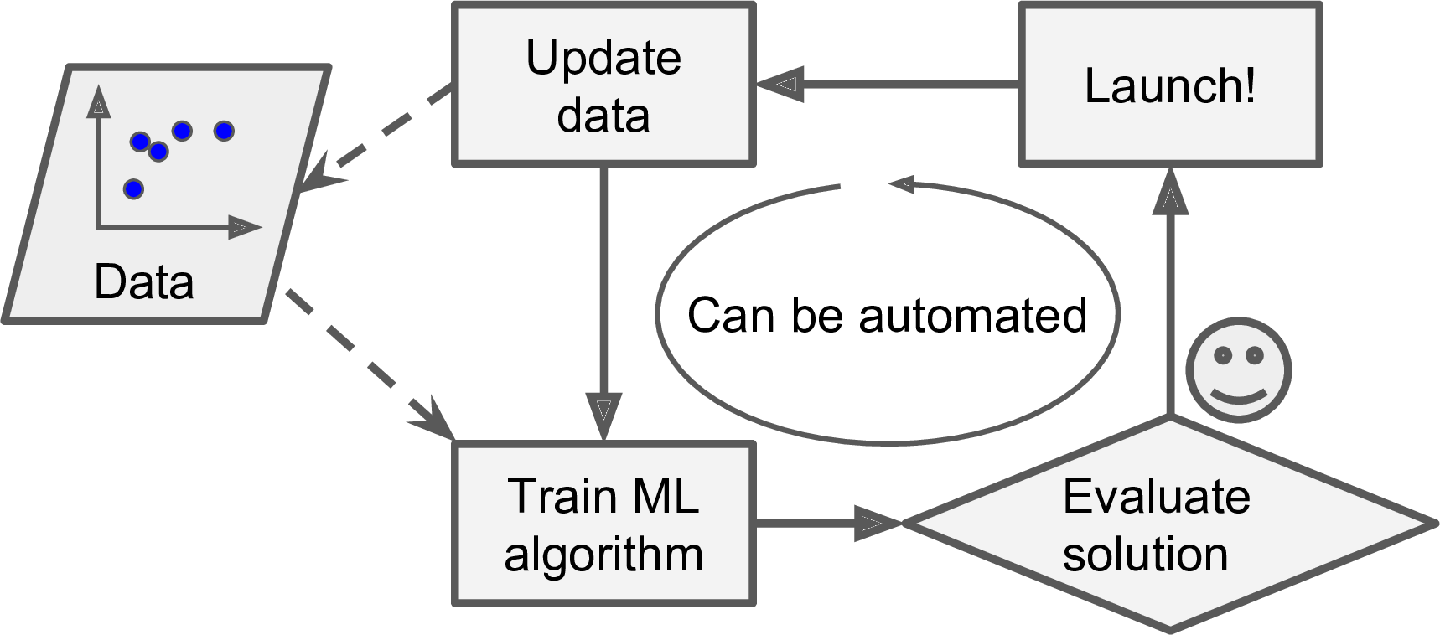

another example where helps for the complex task like speech recognition. "one" & "two" word sound

Image source: shorturl.at/pILQ7

ML is great for 
*  problem for which exisitng solution requrie long list of rules
*  complex problem for which traditinal alogrithm no good results
*  fluctating environment 
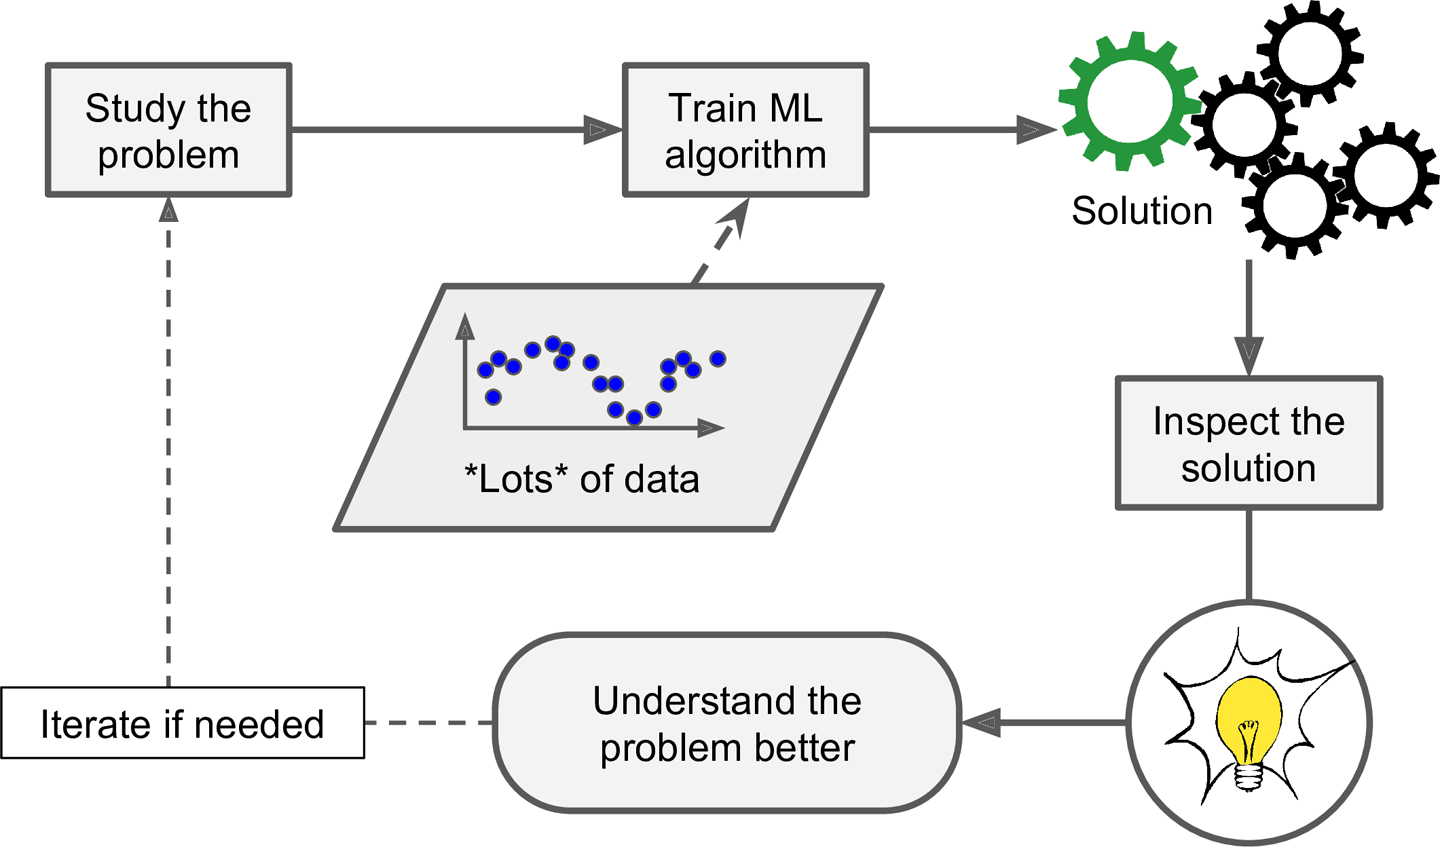

Example of Application
1. CNN (Convolutional neural network) - Analyzing images of products on 
2. CNN - Detecting tumors in brain scans
3. NLP,RNN, CNN, Transformer - Automatically Classify news article
4. NLP - Automatically flagging offensive comments on discussion forums
5. Summarizing long document automatically 
6. Creating a chatbot or personal assistant (NLU)
7. Forecasting your company revenue next year - Regression,  linear or polynomial regression, svm, random forest
8. Making app to react voice commands
9. detecting credit card fraud
10. representing a complex, high dimesional dataset in clear & insightful diagram
11. Recommandation of product (amazon,flipkart)
12. production line to automatically classify them.
13. Building an intellegent bot for a game ( Reinforcement learning)





# **Types of Machine Learning System**

1. Trained with human supervision

    a. Supervised

    b. unsupervised

    c. Semisupervised

    d. Reinforcement Learning 
2. Whether or not Learn Incrementally on fly

    a. online 

    b.  batch learning
3. Comparing new data points to known data points OR detecting patterns in the training data

    a. Instance based 
    
    b. model based learning 

## **a. Supervised Learning**

Training set includes the desired solution (Called labels)

Image source :shorturl.at/xzP26

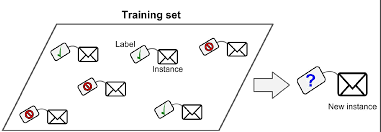

This is example of **classification** to find out whether mail is spam or not

Another example is to predict the price of the car. such type of problem is **regression**  with the help of set of **features** ( milage, age , brand, etc) called **predictor**



Supervised algorithm 

1. K-Nearest Neighbors

2. Linear Regeression

3. Logistic Regression

4. SVM (Support vector Machines)

5. Decision Tree & Random Forests

6. Boosting Algorithm (Gradient Boost, ADABoost, XGBoost etc)

7. Neural Networks.

## **b. Unsupervised Learning**

Training data is unalabeled. System tried to learn without teacher.

Image source : shorturl.at/dmrAY

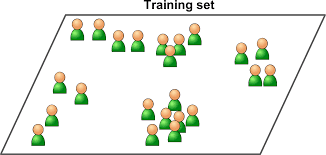



1. Clustering

    1. K-Means
    2. DBSCAN
    3. Hierarchical Cluster Analysis

Grouping customer who visit your blogs

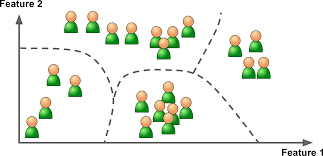

2. Anaomly Detection
    1. One-Class SVM
    2. Isolation forest

Credit Card fraud detection

Catching manufacturing defects

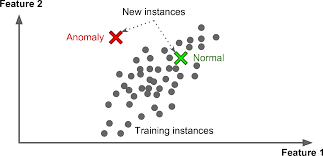



3. Visualization & dimensionality reduction
    1. PCA (Principle Component Analysis)
    2. Kernel PCA
    3. Locally Linear Embedding (LLE)
    4. t-SNE (t-distributed Stochastic Neighbor Embeddings)


Help to find how data is organised & findn the unsuspected patterns

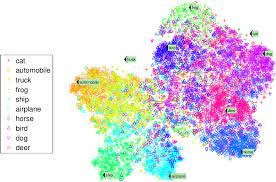


Goal of **dimensional reduction** is to simplify the data without looosing too much information.
By merging highly correlated features. for ex. car milage & age. (Feature Extraction - Cars wear & tear)

Good Practice in Machine learning algorithm (less memory) faster performance



4. **Association** rule learning

    1. Apriori
    2. Esclat

    Aim is to dig down into large amount of data & discover the relation between attributes / features

    for ex. supermarket - people who buy potato chips tend to buy tomato sauce.

## **b. Semisupervised Learning**

labelling is time consuming task & costly.
Parital data is label & remaining is unlabeled.

Combination of supervised & unsupervised learning

ex. Google Photoshop

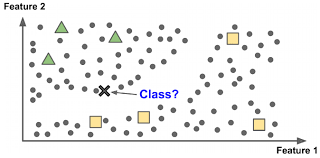

## **b. Reinforcement Learning**

Agent observed an enviornment - gets rewards or penalties depend on action.

Deepmind Alphago Program - good example of RL
May 2017  - beats world champion Ke Jie at the game of GO.

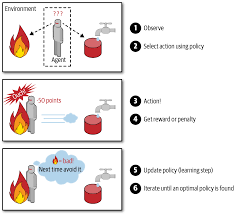


# **Batch or Online Learninig**

**a. Batch Learning**

- Trained using all avilable data
- lot of computation & memory require
- offline method
- also called offline learning - trained once & launched (without learning anymore)
- if new patterns (SPAM example) retrained with old as well as new data. replace old system
- Due to huge data - best solution is to learn incrementally 



**b. Online Learning**
- trained ML model incrementally in small groups called **mini-batch**
- Learning steps is fast & cheap
- Learn about new data on fly as it arrives
example - stock price
- good for limited computing resources.

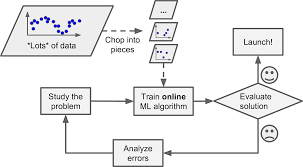


- **Learning Rate** - how fast adapt to changing data. LR is high means rapidly adapt the new data & forget the old data. COnversly LR is small means learning is very slow. less sensitive to noise. (outlier) - Non representative data points

- **Drawback of Online Learning** - Performance will gradually declined due to bad chunk of data, so need to monitor system continuously 

# **Instance or Model-Based Learninig** 
(Based on How model generalised)

**a. Instance based Learning**

- Comparing new data points to known data points
- Simply learn by heart
- compare the new data points with identical data points in the training dataset.

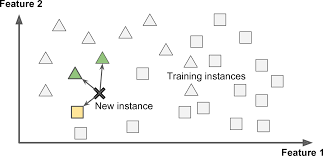

**b. Model based learning**

- Make the ML model using training dataset & use that for prediction

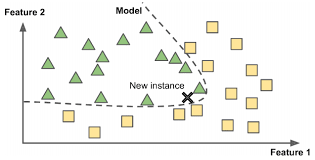

***Problem statement***:- Trying to find out if money make people happy

Life index data from OECD website

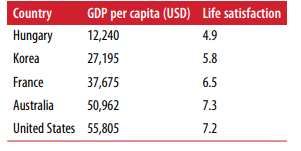

Plot the datapoint on graph

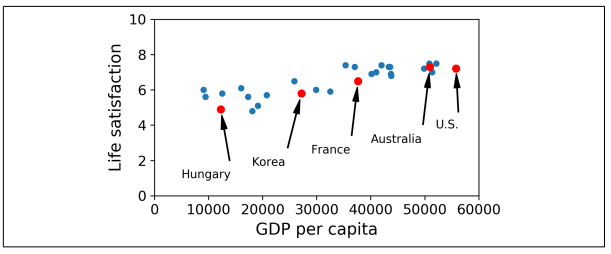

We observed the trend here. i.e Linear Trend. 
and decided to model life satisfaction as linear function of GDP per capita. This step is called **model selection.**

**equation:-**

life_satisfaction = B0 + B1 * GDP_PER_CAPITA 


B0 & B1 is **Model parameter**

By tweaking these parameter you make muliple linear model & get the best one 
TO get the best one we will require to calculate performance measure .

We use **cost function** - This function measure the distance between actual point & predicted point, Objective - Minimise the distance

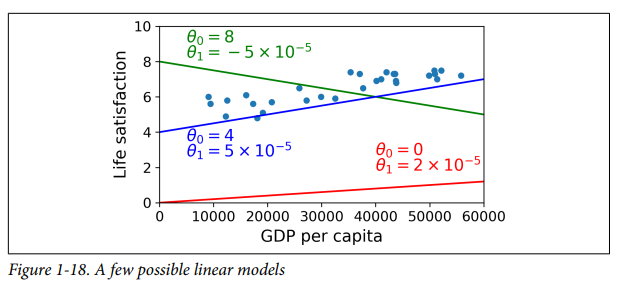

**Training Model** - Find the parameter that makes linear model fit the best of your data

In our case , algorithm finds that optimal value are B0 = 4.85 & B1 = 4.91 * 10-5

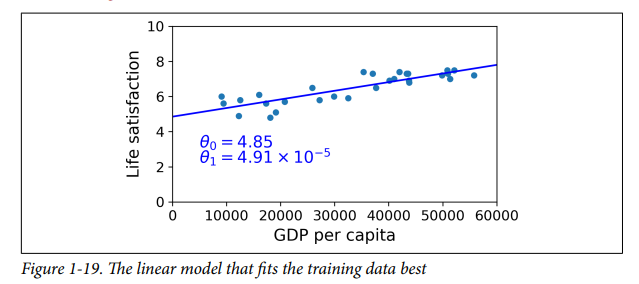

**Prediction** To find out how people happy in XYZ country. OECD does not have answer. we can predict using linear model

Given XYZ country GDP is = $22,857
Bo = 4.85
B1 = 4.91 * 10-5

Ans = 4.85 + 4.91 * 10-5 * 22,857 
    = 5.96

# **Training & Running linear model using sckit learn**

In [1]:
import matplotlib.pyplot as plt # Draw a graph 
import numpy as np              # Mathematical Computation
import pandas as pd             # to read the data, to understand the data
import sklearn.linear_model     # helps to provide algorithm

In [2]:
# load the data

oecd_bli = pd.read_csv('/content/oecd_bli_2015.csv')

In [3]:
type(oecd_bli)

pandas.core.frame.DataFrame

In [5]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [6]:
gdp_per_capita = pd.read_csv("/content/gdp_per_capita.csv")

UnicodeDecodeError: ignored

In [7]:
gdp_per_capita = pd.read_csv("/content/gdp_per_capita.csv",encoding='latin1')

ParserError: ignored

In [9]:
gdp_per_capita = pd.read_csv("/content/gdp_per_capita.csv",encoding='latin1',delimiter='\t')

In [10]:
gdp_per_capita .head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","3,995.383",2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","4,318.135",2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","4,100.315",2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","14,414.302",2011.0


In [11]:
gdp_per_capita = pd.read_csv("/content/gdp_per_capita.csv",encoding='latin1',delimiter='\t',thousands=',',na_values='not avilable')

In [12]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [14]:
gdp_per_capita.isnull().sum(axis=0)

Country                          0
Subject Descriptor               1
Units                            1
Scale                            1
Country/Series-specific Notes    2
2015                             3
Estimates Start After            2
dtype: int64

In [16]:
df = gdp_per_capita[gdp_per_capita.isnull().any(axis=1)]
df

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
88,Kosovo,"Gross domestic product per capita, current prices",U.S. dollars,Units,NaN,NaN,NaN
163,Syria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",NaN,2010.0
189,"International Monetary Fund, World Economic Ou...",NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
oecd_bli_filter = oecd_bli[oecd_bli['INEQUALITY']  == 'TOT']

In [20]:
oecd_bli_filter.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [21]:
oecd_bli_filter = oecd_bli_filter.pivot(index='Country',columns='Indicator',values='Value')

In [22]:
oecd_bli_filter.head()

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,Job security,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,20.0,4.8,82.1,7.3,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,21.0,3.9,81.0,6.9,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,21.0,5.0,80.5,6.9,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,21.0,4.6,73.7,7.0,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,21.0,6.4,81.5,7.3,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


In [23]:
gdp_per_capita_filter = gdp_per_capita.rename(columns={'2015':"GDP per Capita"})
gdp_per_capita_filter.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per Capita,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [24]:
gdp_per_capita_filter.set_index("Country",inplace=True)
gdp_per_capita_filter.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per Capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [25]:
full_country_stats = pd.merge(left=oecd_bli_filter,right=gdp_per_capita_filter,left_index=True,right_index=True)

In [26]:
full_country_stats.head()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,Job security,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per Capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,20.0,4.8,82.1,7.3,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.865,2014.0
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,21.0,3.9,81.0,6.9,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43724.031,2015.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,21.0,5.0,80.5,6.9,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",40106.632,2014.0
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,21.0,4.6,73.7,7.0,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,21.0,6.4,81.5,7.3,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43331.961,2015.0


In [27]:
full_country_stats.sort_values(by='GDP per Capita',inplace = True)
full_country_stats.head()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,Job security,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per Capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,21.0,4.6,73.7,7.0,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,21.0,4.9,74.6,6.7,0.08,16193.0,77.0,1.0,66.0,417.0,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,11.0,4.0,70.2,6.0,1.70,20885.0,90.0,0.9,37.0,481.0,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,21.0,8.1,74.6,5.6,2.37,16919.0,86.0,1.1,68.0,462.0,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,20.0,5.7,75.2,4.9,5.10,20948.0,87.0,1.1,57.0,487.0,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0


In [28]:
full_country_filter = full_country_stats[['GDP per Capita',"Life satisfaction"]]
full_country_filter.head()

,GDP per Capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9


In [31]:
X = np.c_[full_country_filter['GDP per Capita']]
X

array([[  8669.998],
       [  9009.28 ],
       [  9054.914],
       [  9437.372],
       [ 12239.894],
       [ 12495.334],
       [ 13340.905],
       [ 15991.736],
       [ 17256.918],
       [ 17288.083],
       [ 18064.288],
       [ 19121.592],
       [ 20732.482],
       [ 25864.721],
       [ 27195.197],
       [ 29866.581],
       [ 32485.545],
       [ 35343.336],
       [ 37044.891],
       [ 37675.006],
       [ 40106.632],
       [ 40996.511],
       [ 41973.988],
       [ 43331.961],
       [ 43603.115],
       [ 43724.031],
       [ 43770.688],
       [ 49866.266],
       [ 50854.583],
       [ 50961.865],
       [ 51350.744],
       [ 52114.165],
       [ 55805.204],
       [ 74822.106],
       [ 80675.308],
       [101994.093]])

In [32]:
y = np.c_[full_country_filter['Life satisfaction']]

In [35]:
X.ndim, y.ndim

(2, 2)

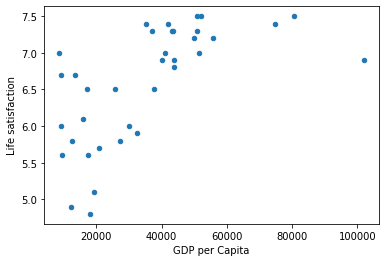

In [37]:
full_country_filter.plot(kind='scatter',x='GDP per Capita',y='Life satisfaction')
plt.show()

In [38]:
# Load the model
model = sklearn.linear_model.LinearRegression()

In [39]:
# Train the model on data
model.fit(X,y)

LinearRegression()

In [40]:
# Prediction - 

X_new = [[33587]]
print(model.predict(X_new))

[[6.54148708]]


If you think this prediction is good. you can go ahead with this model or check with other ml model like KNN & many more. also you may need to other features like employment rate, health, air pollution etc.)

**In summary**
- Studied the data
- selected the model
- trained the model on the data (lr algo search for the best parameter values that minimize the cost function)
- applied model to make prediction on new cases (**inference**)

This is what typical machine learning project look like


**Till now what we have covered:**

1. What is machine learing?
2. Why we need it?
3. Types of ML
4. Typical project workflow using actual implementation.

# **Main Challenges of Machine Learing**